In [1]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

import argparse
import gradio as gr
import torch
from PIL import Image
import re
from donut import DonutModel


In [2]:
#evaluate von unser Model(amirroshan/cord_v2_roshan_barat_model)

from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("amirroshan/cord_v2_roshan_barat_model")
model = VisionEncoderDecoderModel.from_pretrained("amirroshan/cord_v2_roshan_barat_model")

device = "cuda" if torch.cuda.is_available() else "cpu"

model.eval()
model.to(device)

#sample image(Sie können Ihre gewünschte Bilder aus (datset_all) directory in zipfile auswählen)
input_img = Image.open('62.jpg')
input_img

pixel_values = processor(input_img.convert("RGB"), return_tensors="pt").pixel_values
pixel_values = pixel_values.to(device)
# prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
decoder_input_ids = decoder_input_ids.to(device)

# autoregressively generate sequence
outputs = model.generate(
        pixel_values,
        decoder_input_ids=decoder_input_ids,
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=1,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )

# turn into JSON
seq = processor.batch_decode(outputs.sequences)[0]
seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
seq = processor.token2json(seq)

In [3]:
seq

{'menu': [{'nm': 'Pan Bombay', 'cnt': '1', 'price': '12,49', 'etc': '28'},
  {'nm': 'Pan Salami', 'cnt': '1', 'price': '11,99', 'etc': '28'},
  {'nm': 'Coca Cola', 'cnt': '1', 'price': '3,29'},
  {'nm': 'Fuze Eistee Pfirsich', 'cnt': '1', 'price': '2,29', 'etc': '400ml'},
  {'nm': 'Jalapeno Cheese Bites', 'cnt': '2', 'price': '9,98'}],
 'sub_total': {'subtotal_price': '37,31'},
 'total': {'total_price': '40,54', 'creditcardprice': '40,54'}}

In [4]:
#evaluate von cord-v2 Model(naver-clova-ix/donut-base-finetuned-cord-v2)


processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

device = "cuda" if torch.cuda.is_available() else "cpu"

model.eval()
model.to(device)

#sample image(Sie können Ihre gewünschte Bilder aus (datset_all) directory in zipfile auswählen)
input_img = Image.open('62.jpg')
input_img

pixel_values = processor(input_img.convert("RGB"), return_tensors="pt").pixel_values
pixel_values = pixel_values.to(device)
# prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
decoder_input_ids = decoder_input_ids.to(device)

# autoregressively generate sequence
outputs = model.generate(
        pixel_values,
        decoder_input_ids=decoder_input_ids,
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=1,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )

# turn into JSON
seq_cord_v2 = processor.batch_decode(outputs.sequences)[0]
seq_cord_v2 = seq_cord_v2.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
seq_cord_v2 = re.sub(r"<.*?>", "", seq_cord_v2, count=1).strip()  # remove first task start token
seq_cord_v2 = processor.token2json(seq_cord_v2)


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


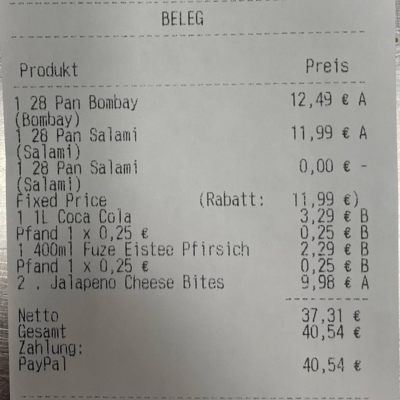

In [5]:
#sample image

input_img.resize((400,400))

In [6]:
# hier erhalten wir JSON aus cord v2 oder BaseMOdel
print("output json aus Cord-V2 = .... ")
print("")
seq_cord_v2

output json aus Cord-V2 = .... 



{'menu': [{'nm': 'BELEG', 'cnt': '1', 'price': '12,49 & A'},
  {'nm': '(Salami)',
   'num': '28',
   'cnt': '1',
   'price': '3,29',
   'unitprice': '3,29'},
  {'nm': 'Coca Cola', 'unitprice': '0,25', 'cnt': '1 x', 'price': '0,25'},
  {'nm': '400ml Fuze Eistee Pfirsich', 'cnt': '1', 'price': '2,29'},
  {'nm': 'Pfand 1 x 0,25', 'unitprice': '0,25', 'cnt': '2', 'price': '0,25'}],
 'sub_total': {'subtotal_price': '9,98',
  'tax_price': '40,54',
  'etc': ['37,31', '40,54', '40,54']}}

In [7]:
# hier erhalten wir JSON aus unser selbst gemachte Model
print("output json aus unser model = .... ")
print("")
seq

output json aus unser model = .... 



{'menu': [{'nm': 'Pan Bombay', 'cnt': '1', 'price': '12,49', 'etc': '28'},
  {'nm': 'Pan Salami', 'cnt': '1', 'price': '11,99', 'etc': '28'},
  {'nm': 'Coca Cola', 'cnt': '1', 'price': '3,29'},
  {'nm': 'Fuze Eistee Pfirsich', 'cnt': '1', 'price': '2,29', 'etc': '400ml'},
  {'nm': 'Jalapeno Cheese Bites', 'cnt': '2', 'price': '9,98'}],
 'sub_total': {'subtotal_price': '37,31'},
 'total': {'total_price': '40,54', 'creditcardprice': '40,54'}}